# Loading modules

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

# Loading data

In [4]:
# !wget https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-03-23/unvotes.csv ./unvotes.csv
# !wget https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-03-23/roll_calls.csv ./roll_calls.csv
# !wget https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-03-23/issues.csv ./issues.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
unvotes = pd.read_csv("unvotes.csv")
rollcalls = pd.read_csv("roll_calls.csv")
issues = pd.read_csv("issues.csv")

In [6]:
print(unvotes.head(3))

   rcid        country country_code vote
0     3  United States           US  yes
1     3         Canada           CA   no
2     3           Cuba           CU  yes


In [7]:
print(rollcalls.head(3))

   rcid  session  importantvote        date   unres  amend  para  \
0     3        1            0.0  1946-01-01  R/1/66    1.0   0.0   
1     4        1            0.0  1946-01-02  R/1/79    0.0   0.0   
2     5        1            0.0  1946-01-04  R/1/98    0.0   0.0   

                            short  \
0  AMENDMENTS, RULES OF PROCEDURE   
1      SECURITY COUNCIL ELECTIONS   
2                VOTING PROCEDURE   

                                               descr  
0  TO ADOPT A CUBAN AMENDMENT TO THE UK PROPOSAL ...  
1  TO ADOPT A USSR PROPOSAL ADJOURNING DEBATE ON ...  
2  TO ADOPT THE KOREAN PROPOSAL THAT INVALID BALL...  


In [8]:
print(issues.head(3))

   rcid short_name                 issue
0    77         me  Palestinian conflict
1  9001         me  Palestinian conflict
2  9002         me  Palestinian conflict


# The 5 permanent members of the security council

In [9]:
unvotes_5 = unvotes.loc[unvotes.country_code.isin(["US", "GB", "FR", "RU", "CN"]),:].reset_index()
print(unvotes_5.head())

   index  rcid         country country_code vote
0      0     3   United States           US  yes
1     22     3  United Kingdom           GB   no
2     26     3          France           FR   no
3     31     3          Russia           RU   no
4     51     4   United States           US   no


In [10]:
unvotes_5_joined = pd.merge(unvotes_5, rollcalls, how='inner', on='rcid')
unvotes_5_joined = pd.merge(unvotes_5_joined, issues, how='inner', on='rcid')
unvotes_5_joined['year'] = pd.DatetimeIndex(unvotes_5_joined['date']).year
print(unvotes_5_joined.head())

   index  rcid         country country_code vote  session  importantvote  \
0    153     6   United States           US   no        1            0.0   
1    173     6  United Kingdom           GB   no        1            0.0   
2    177     6          France           FR   no        1            0.0   
3    182     6          Russia           RU   no        1            0.0   
4    245     8   United States           US   no        1            0.0   

         date    unres  amend  para                        short  \
0  1946-01-04  R/1/107    0.0   0.0  DECLARATION OF HUMAN RIGHTS   
1  1946-01-04  R/1/107    0.0   0.0  DECLARATION OF HUMAN RIGHTS   
2  1946-01-04  R/1/107    0.0   0.0  DECLARATION OF HUMAN RIGHTS   
3  1946-01-04  R/1/107    0.0   0.0  DECLARATION OF HUMAN RIGHTS   
4  1946-01-05  R/1/297    1.0   0.0                ECOSOC POWERS   

                                               descr short_name  \
0  TO ADOPT A CUBAN PROPOSAL (A/3-C) THAT AN ITEM...         hr   


## Summaising proporions

In [11]:
unvotes_5_percent = unvotes_5_joined.groupby(by=['year', 'country_code', 'vote']).size().to_frame(name = 'n').reset_index()
unvotes_5_percent["percent"] = unvotes_5_percent.groupby(by=['year', 'country_code'])['n'].transform(lambda x: x/sum(x))
print(unvotes_5_percent.head())

   year country_code     vote   n   percent
0  1946           FR  abstain   3  0.111111
1  1946           FR       no   6  0.222222
2  1946           FR      yes  18  0.666667
3  1946           GB  abstain   1  0.037037
4  1946           GB       no   7  0.259259


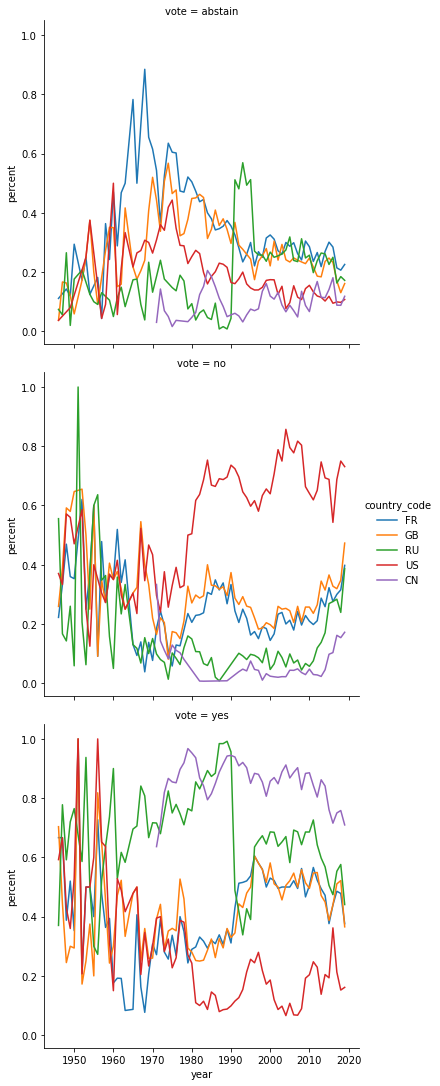

In [12]:
sns.relplot(
    data=unvotes_5_percent, x="year", y="percent", hue="country_code",
    row="vote",
    kind="line")

# Hierachical clustering (ignoring temporal nature)

In [76]:
## Preparing the matrix
unvotes_joined = pd.merge(unvotes, rollcalls, how='inner', on='rcid')
unvotes_joined = pd.merge(unvotes_joined, issues, how='inner', on='rcid')
unvotes_joined['year'] = pd.DatetimeIndex(unvotes_joined['date']).year

In [77]:
unvotes_percent = unvotes_joined.groupby(by=['year', 'country', 'vote']).size().to_frame(name = 'n').reset_index()
unvotes_percent["percent"] = unvotes_percent.groupby(by=['year', 'country'])['n'].transform(lambda x: x/sum(x))
unvotes_percent = unvotes_percent.loc[unvotes_percent.vote=='yes', :].reset_index(drop=True)
print(unvotes_percent.head())

   year      country vote   n   percent
0  1946  Afghanistan  yes   3  0.250000
1  1946    Argentina  yes  21  0.777778
2  1946    Australia  yes  15  0.555556
3  1946      Belarus  yes  10  0.370370
4  1946      Belgium  yes  17  0.629630


In [78]:
unvotes_percent = unvotes_percent.drop(columns=["vote", "n"])
print(unvotes_percent)

       year      country   percent
0      1946  Afghanistan  0.250000
1      1946    Argentina  0.777778
2      1946    Australia  0.555556
3      1946      Belarus  0.370370
4      1946      Belgium  0.629630
...     ...          ...       ...
10433  2019      Vietnam  0.956989
10434  2019        Yemen  0.989247
10435  2019   Yugoslavia  0.494382
10436  2019       Zambia  0.956044
10437  2019     Zimbabwe  0.720430

[10438 rows x 3 columns]


In [79]:
unvotes_percent_wide = unvotes_percent.pivot(index="year", columns="country", values="percent")
unvotes_percent_wide = unvotes_percent_wide.fillna(0)
print(unvotes_percent_wide)

country  Afghanistan   Albania   Algeria   Andorra    Angola  \
year                                                           
1946        0.250000  0.000000  0.000000  0.000000  0.000000   
1947        0.352941  0.000000  0.000000  0.000000  0.000000   
1948        0.326531  0.000000  0.000000  0.000000  0.000000   
1949        0.533333  0.000000  0.000000  0.000000  0.000000   
1950        0.882353  0.000000  0.000000  0.000000  0.000000   
...              ...       ...       ...       ...       ...   
2015        0.978022  0.527473  0.934783  0.537634  0.886792   
2016        0.954955  0.612069  0.879310  0.612069  0.938053   
2017        0.985075  0.557143  0.928058  0.585714  0.875912   
2018        0.939759  0.586957  0.858696  0.673913  0.975309   
2019        0.967391  0.376344  0.892473  0.623656  0.967391   

country  Antigua & Barbuda  Argentina   Armenia  Australia   Austria  ...  \
year                                                                  ...   
1946         

In [80]:
unvotes_percent_wide_array = np.array(unvotes_percent_wide).transpose()
print(unvotes_percent_wide_array)
print(unvotes_percent_wide_array.shape)

[[0.25       0.35294118 0.32653061 ... 0.98507463 0.93975904 0.9673913 ]
 [0.         0.         0.         ... 0.55714286 0.58695652 0.37634409]
 [0.         0.         0.         ... 0.92805755 0.85869565 0.89247312]
 ...
 [0.37037037 0.66666667 0.59183673 ... 0.60150376 0.65168539 0.49438202]
 [0.         0.         0.         ... 0.96923077 0.94505495 0.95604396]
 [0.         0.         0.         ... 0.8671875  0.82608696 0.72043011]]
(199, 73)


In [81]:
from sklearn.cluster import AgglomerativeClustering

In [82]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
clustering = model.fit(unvotes_percent_wide_array)
clustering.labels_

array([146, 103, 161, 184, 179, 180, 145, 142, 121, 173, 177, 102, 195,
       123, 141, 134, 174, 148, 171, 152, 131, 119, 127, 149, 151, 122,
       178,  60, 115, 138, 100, 190, 172, 162, 120, 128, 147, 105, 143,
       106, 126, 188, 191, 153, 198, 133, 104, 187, 189,  86, 137, 164,
       175,  59,  99,  75, 197, 157, 116, 101,  88,  73,  29, 158,  52,
        89, 193, 192, 166, 118, 167, 176,  93, 144, 168,  94, 165,  83,
        78, 117,  58, 150, 163,  71,  63,  85, 169, 181, 186, 170,  74,
        98, 159,  57, 111, 196, 132, 114, 155, 183, 140, 110, 125, 156,
       113, 136,  91,  82,  72, 135, 129, 108, 154, 130, 185,  77, 109,
        65, 182,  97,  84,  50, 139,  35,  80,  64, 107, 112, 160,  68,
        95,  81, 194,  67,  36,  33,  38,  70,  62,  48,  76,  28,  96,
        87,  37,  92,  49,  31,  24,  54,  46,  42,  18,  17,  47,  69,
        45,  53,  79,  23,   8,  90,  11,  66, 124,  43,  44,  61,  55,
        26,  41,  21,  56,  51,  27,  32,  30,  25,  15,  13,  1

In [85]:
import plotly.figure_factory as ff
import numpy as np

In [86]:
# !pip install plotly

In [87]:
from plotly.figure_factory import create_dendrogram

In [88]:
fig = create_dendrogram(unvotes_percent_wide_array, labels=unvotes_percent_wide.columns)
fig.show()